# KMEANS

INTEGRANTES
Juan Camilo Orozco Carmona

# **EXPERIMENTO 1**

**iteracción 10**

[2 1 0 1 1 1 1 1 1 0 0 0 1 2 2 1 1 1 2 2 0 1 1 1 0 0 1 2 0 0 0 1 2 2 1 1 1
 1 1 1 0 2 2 1 1 1 0 2 1 1 1 1 1 1 0 1 0 0 1 2 0 0 1 1 1 1 2 2 2 1 1 0 0 2
 1 1 0 2 1 1 0 1 1 1 0 0 2 1 1 1 0 2 1 0 1 0 2 2 1 2 1 1 1 1 2 1 1 2 1 1 0
 2 1 2 1 1 1 1 1 2 0 1 2 1 2 1 0 1 0 2 1 1 0 1 1 2 2 1 1 1 2 0 0 1 1 2 2 1
 2 2 0 2 0 0 1 2 1 2 1 0 1 1 0 1 1 1 2 0 1 2 1 2 1 2 0 1 0 0 1 1 2 2 2 1 1
 1 0 1 1 2 2 1 2 1 2 1 1 0 1 2 2 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 2 1 1
 0 1 0 1 0 1 1 1 0 1 1 1 1 2 1 2 1 1 0 2 0 1 1 1 1 1 1 2 0 1 2 0 1 1 0 1 0
 1 2 1 1 0 2 2 1 0 0 1 1 1 0 1 2 1 0 2 2 1 1 2 2 0 2 1 2 1 0 0 2 0 0 2 1 1
 2 1 0 2 1 1 1 1 2 1 0 1 2 0 0 2 0 0 1 1 2 0 1 1 0 1 0 2 2 0 1 1 2 1 2 2 0
 1 0 2 0 0 1 0 0 1 0 1 1 1 0 0 2 1 1 2 0 1 1 2 2 0 2 1 1 2 0 1 2 1 1 2 2 0
 2 1 1 1 1 1 2 1 1 2 2 0 1 1 1 1 1 0 0 1 0 2 1 1 1 1 0 0 1 2 2 2 1 0 0 2 1
 2 0 2 1 1 0 1 1 1 0 2 1 1 1 1 2 1 1 2 1 2 1 1 1 1 0 0 1 1 2 2 1 2 1 1 2 2
 0 2 1 1 0 0 0 1 1 1 0 2 2 2 1 2 1 1 0 1 1 1 2 1 1 1 1 1 1 1 0 1 2 0 0 2 0
 0 1 1 1 0 2 2 1 1 1 2 1 

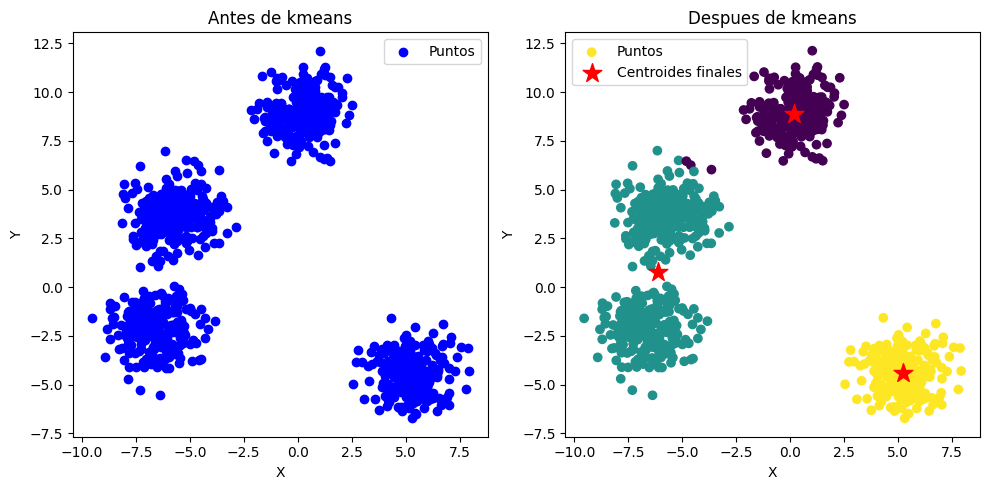

In [207]:
import matplotlib.pyplot as plt
import numpy as np

class KMeans:

    def __init__(self, k=3, max_iter=10, centroids = None):

        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):

        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):

        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):

        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):


        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):


        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()



from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)

kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

dibujar2D(points, kmeans.centroids, labels)

**1 PUNTO MAX ITERACCIÓN 100**

[2 0 1 0 0 0 0 0 0 1 1 1 0 2 2 0 0 0 2 2 1 0 0 0 1 1 0 2 1 1 1 0 2 2 0 0 0
 0 0 0 1 2 2 0 0 0 1 2 0 0 0 0 0 0 1 0 1 1 0 2 1 1 0 0 0 0 2 2 2 0 0 1 1 2
 0 0 1 2 0 0 1 0 0 0 1 1 2 0 0 0 1 2 0 1 0 1 2 2 0 2 0 0 0 0 2 0 0 2 0 0 1
 2 0 2 0 0 0 0 0 2 1 0 2 0 2 0 1 0 1 2 0 0 1 0 0 2 2 0 0 0 2 1 1 0 0 2 2 0
 2 2 1 2 1 1 0 2 0 2 0 1 0 0 1 0 0 0 2 1 0 2 0 2 0 2 1 0 1 1 0 0 2 2 2 0 0
 0 1 0 0 2 2 0 2 0 2 0 0 1 0 2 2 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 2 0 0
 1 0 1 0 1 0 0 0 1 0 0 0 0 2 0 2 0 0 1 2 1 0 0 0 0 0 0 2 1 0 2 1 0 0 1 0 1
 0 2 0 0 1 2 2 0 1 1 0 0 0 1 0 2 0 1 2 2 0 0 2 2 1 2 0 2 0 1 1 2 1 1 2 0 0
 2 0 1 2 0 0 0 0 2 0 1 0 2 1 1 2 1 1 0 0 2 1 0 0 1 0 1 2 2 1 0 0 2 0 2 2 1
 0 1 2 1 1 0 1 1 0 1 0 0 0 1 1 2 0 0 2 1 0 0 2 2 1 2 0 0 2 1 0 2 0 0 2 2 1
 2 0 0 0 0 0 2 0 0 2 2 1 0 0 0 0 0 1 1 0 1 2 0 0 0 0 1 1 0 2 2 2 0 1 1 2 0
 2 1 2 0 0 1 0 0 0 1 2 0 0 0 0 2 0 0 2 0 2 0 0 0 0 1 1 0 0 2 2 0 2 0 0 2 2
 1 2 0 0 1 1 1 0 0 0 1 2 2 2 0 2 0 0 1 0 0 0 2 0 0 0 0 0 0 0 1 0 2 1 1 2 1
 1 0 0 0 1 2 2 0 0 0 2 0 

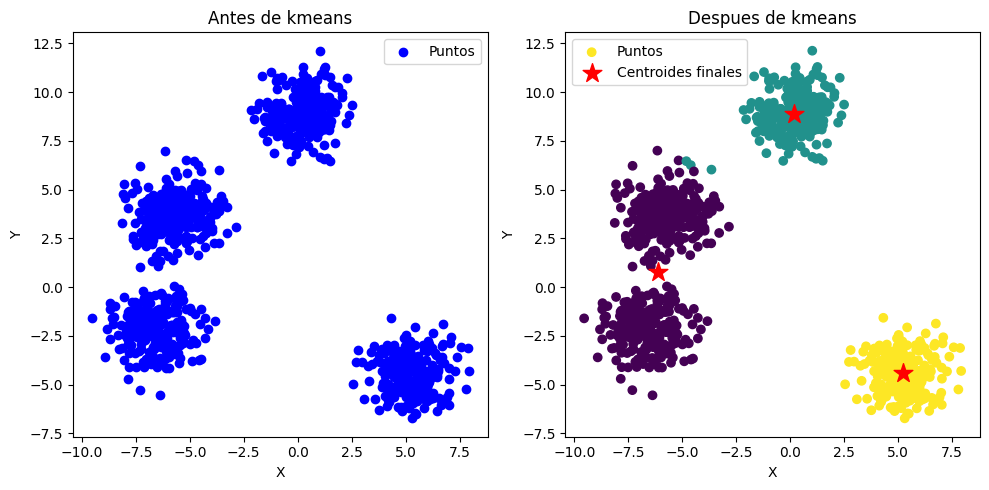

In [174]:
kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

dibujar2D(points, kmeans.centroids, labels)

**PUNTO 1 MAX ITERACCIÓN 1000**

[1 2 0 2 2 2 2 2 2 0 0 0 2 1 1 2 2 2 1 1 0 2 2 2 0 0 2 1 0 0 0 2 1 1 2 2 2
 2 2 2 0 1 1 2 2 2 0 1 2 2 2 2 2 2 0 2 0 0 2 1 0 0 2 2 2 2 1 1 1 2 2 0 0 1
 2 2 0 1 2 2 0 2 2 2 0 0 1 2 2 2 0 1 2 0 2 0 1 1 2 1 2 2 2 2 1 2 2 1 2 2 0
 1 2 1 2 2 2 2 2 1 0 2 1 2 1 2 0 2 0 1 2 2 0 2 2 1 1 2 2 2 1 0 0 2 2 1 1 2
 1 1 0 1 0 0 2 1 2 1 2 0 2 2 0 2 2 2 1 0 2 1 2 1 2 1 0 2 0 0 2 2 1 1 1 2 2
 2 0 2 2 1 1 2 1 2 1 2 2 0 2 1 1 0 2 2 0 0 2 0 2 0 0 2 0 2 2 0 2 2 0 1 2 2
 0 2 0 2 0 2 2 2 0 2 2 2 2 1 2 1 2 2 0 1 0 2 2 2 2 2 2 1 0 2 1 0 2 2 0 2 0
 2 1 2 2 0 1 1 2 0 0 2 2 2 0 2 1 2 0 1 1 2 2 1 1 0 1 2 1 2 0 0 1 0 0 1 2 2
 1 2 0 1 2 2 2 2 1 2 0 2 1 0 0 1 0 0 2 2 1 0 2 2 0 2 0 1 1 0 2 2 1 2 1 1 0
 2 0 1 0 0 2 0 0 2 0 2 2 2 0 0 1 2 2 1 0 2 2 1 1 0 1 2 2 1 0 2 1 2 2 1 1 0
 1 2 2 2 2 2 1 2 2 1 1 0 2 2 2 2 2 0 0 2 0 1 2 2 2 2 0 0 2 1 1 1 2 0 0 1 2
 1 0 1 2 2 0 2 2 2 0 1 2 2 2 2 1 2 2 1 2 1 2 2 2 2 0 0 2 2 1 1 2 1 2 2 1 1
 0 1 2 2 0 0 0 2 2 2 0 1 1 1 2 1 2 2 0 2 2 2 1 2 2 2 2 2 2 2 0 2 1 0 0 1 0
 0 2 0 2 0 1 1 2 2 2 1 2 

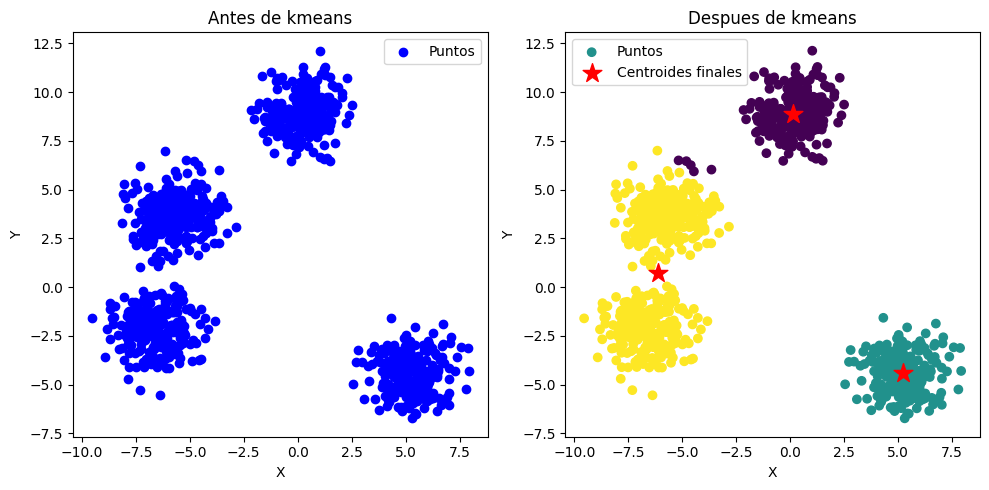

In [175]:
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

dibujar2D(points, kmeans.centroids, labels)

**PUNTO 1 MAX ITERACCIÓN 10000**

[1 2 0 2 2 2 2 2 2 0 0 0 2 1 1 2 2 2 1 1 0 2 2 2 0 0 2 1 0 0 0 2 1 1 2 2 2
 2 2 2 0 1 1 2 2 2 0 1 2 2 2 2 2 2 0 2 0 0 2 1 0 0 2 2 2 2 1 1 1 2 2 0 0 1
 2 2 0 1 2 2 0 2 2 2 0 0 1 2 2 2 0 1 2 0 2 0 1 1 2 1 2 2 2 2 1 2 2 1 2 2 0
 1 2 1 2 2 2 2 2 1 0 2 1 2 1 2 0 2 0 1 2 2 0 2 2 1 1 2 2 2 1 0 0 2 2 1 1 2
 1 1 0 1 0 0 2 1 2 1 2 0 2 2 0 2 2 2 1 0 2 1 2 1 2 1 0 2 0 0 2 2 1 1 1 2 2
 2 0 2 2 1 1 2 1 2 1 2 2 0 2 1 1 0 2 2 0 0 2 0 2 0 0 2 0 2 2 0 2 2 0 1 2 2
 0 2 0 2 0 2 2 2 0 2 2 2 2 1 2 1 2 2 0 1 0 2 2 2 2 2 2 1 0 2 1 0 2 2 0 2 0
 2 1 2 2 0 1 1 2 0 0 2 2 2 0 2 1 2 0 1 1 2 2 1 1 0 1 2 1 2 0 0 1 0 0 1 2 2
 1 2 0 1 2 2 2 2 1 2 0 2 1 0 0 1 0 0 2 2 1 0 2 2 0 2 0 1 1 0 2 2 1 2 1 1 0
 2 0 1 0 0 2 0 0 2 0 2 2 2 0 0 1 2 2 1 0 2 2 1 1 0 1 2 2 1 0 2 1 2 2 1 1 0
 1 2 2 2 2 2 1 2 2 1 1 0 2 2 2 2 2 0 0 2 0 1 2 2 2 2 0 0 2 1 1 1 2 0 0 1 2
 1 0 1 2 2 0 2 2 2 0 1 2 2 2 2 1 2 2 1 2 1 2 2 2 2 0 0 2 2 1 1 2 1 2 2 1 1
 0 1 2 2 0 0 0 2 2 2 0 1 1 1 2 1 2 2 0 2 2 2 1 2 2 2 2 2 2 2 0 2 1 0 0 1 0
 0 2 0 2 0 1 1 2 2 2 1 2 

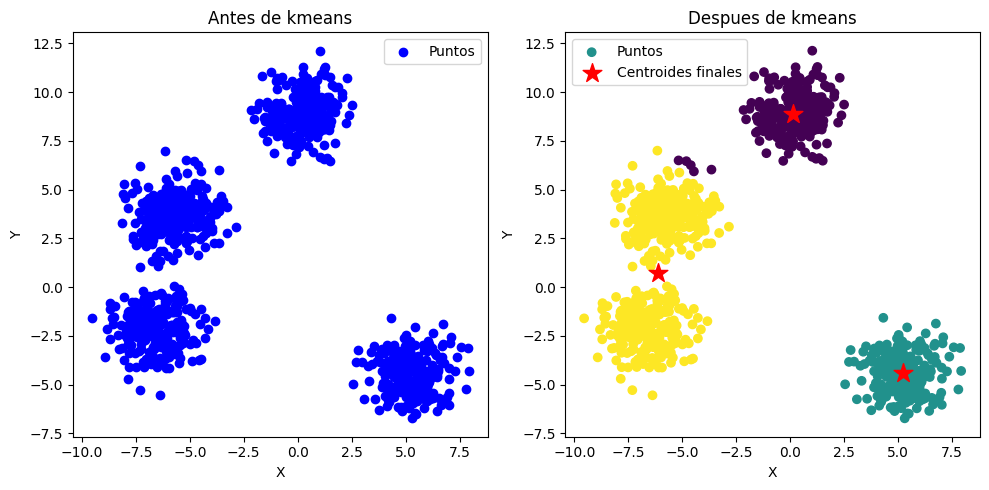

In [211]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

dibujar2D(points, kmeans.centroids, labels)

**CONCLUSIONES EXPERIMENTO 1**

# **EXPERIMENTO 2**

In [177]:
import matplotlib.pyplot as plt
import numpy as np

class KMeans:

    def __init__(self, k=3, max_iter=10, centroids = None):

        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):

        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):

        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):

        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):


        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):


        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [178]:
def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

[1 0 0 0 0 0 0 2 2 1 2 1 1 0 0 2 0 1 0 2 0 1 0 0 1 0 1 2 0 2 0 0 2 0 2 0 0
 2 0 1 0 0 0 0 0 2 1 2 0 2 0 0 2 0 0 2 0 1 2 0 2 2 0 0 1 0 0 2 0 0 2 0 2 0
 0 0 1 0 0 2 1 1 1 0 0 1 1 2 2 0 0 2 0 0 2 0 1 2 1 2 0 0 2 1 0 0 1 1 0 2 2
 1 0 1 2 1 0 2 1 0 1 0 0 1 2 1 0 2 0 0 0 2 0 0 0 0 2 0 2 0 1 2 2 1 2 2 1 1
 0 1 1 0 0 0 1 1 2 1 0 0 2 1 2 0 0 0 1 0 1 0 0 0 0 0 1 0 0 2 0 1 2 2 1 1 0
 0 2 0 0 0 1 2 1 1 0 1 2 1 0 0 0 2 1 1 2 0 0 2 2 2 0 0 0 1 0 1 1 2 1 0 0 2
 0 1 1 1 0 1 0 2 2 0 0 1 2 1 0 2 2 0 0 0 0 2 0 0 1 0 1 0 0 2 1 1 2 1 0 2 2
 0 1 1 2 2 2 0 1 0 1 1 0 1 1 1 2 0 0 1 1 0 0 0 2 2 1 1 2 0 2 2 0 0 2 2 2 1
 1 0 0 1 2 0 0 1 1 0 0 0 2 2 2 2 2 0 0 2 2 2 2 0 0 0 0 0 0 2 0 1 1 2 1 1 2
 0 0 0 0 2 1 1 0 0 1 0 2 0 2 0 0 1 2 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0
 0 0 0 0 2 0 0 0 2 1 0 0 1 0 0 2 2 1 0 2 2 0 2 0 1 1 2 0 0 0 0 2 0 0 0 1 0
 2 0 2 0 0 0 1 0 0 0 0 2 1 2 2 1 0 2 0 0 1 0 2 0 1 0 1 0 1 0 0 2 0 0 0 0 2
 0 1 1 2 1 2 1 2 0 2 0 0 2 1 1 0 2 1 1 0 1 0 0 1 0 0 2 2 0 1 0 2 0 0 0 0 0
 1 1 2 1 1 0 1 1 1 1 2 0 

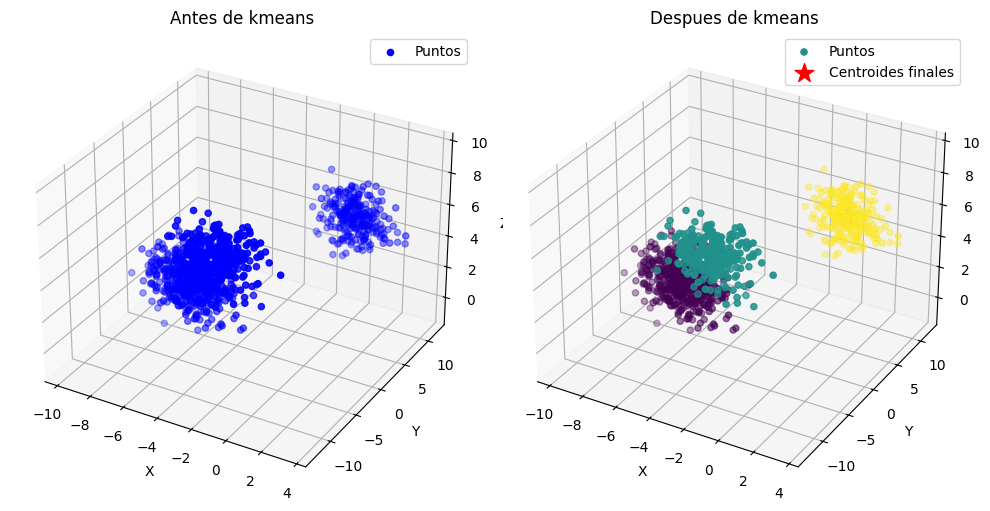

In [179]:


from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)

kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

dibujar3D(points, kmeans.centroids, labels)

**Experimento 2 iteracción 100**

[0 1 1 1 1 1 1 2 2 0 2 0 0 1 1 2 1 0 1 2 1 0 1 1 0 1 0 2 1 2 1 1 2 1 2 1 1
 2 1 0 1 1 1 1 1 2 0 2 1 2 1 1 2 1 1 2 1 0 2 1 2 2 1 1 0 1 1 2 1 1 2 1 2 1
 1 1 0 1 1 2 0 0 0 1 1 0 0 2 2 1 1 2 1 1 2 1 0 2 0 2 1 1 2 0 1 1 0 0 1 2 2
 0 1 0 2 0 1 2 0 1 0 1 1 0 2 0 1 2 1 1 1 2 1 1 1 1 2 1 2 1 0 2 2 0 2 2 0 0
 1 0 0 1 1 1 0 0 2 0 1 1 2 0 2 1 1 1 0 1 0 1 1 1 1 1 0 1 1 2 1 0 2 2 0 0 1
 1 2 1 1 1 0 2 0 0 1 0 2 0 1 1 1 2 0 0 2 1 1 2 2 2 1 1 1 0 1 0 0 2 0 1 1 2
 1 0 0 0 1 0 1 2 2 1 1 0 2 0 1 2 2 1 1 1 1 2 1 1 0 1 0 1 1 2 0 0 2 0 1 2 2
 1 0 0 2 2 2 1 0 1 0 0 1 0 0 0 2 1 1 0 0 1 1 1 2 2 0 0 2 1 2 2 1 1 2 2 2 0
 0 1 1 0 2 1 1 0 0 1 1 1 2 2 2 2 2 1 1 2 2 2 2 1 1 1 1 1 1 2 1 0 0 2 0 0 2
 1 1 1 1 2 0 0 1 1 0 1 2 1 2 1 1 0 2 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1
 1 1 1 1 2 1 1 1 2 0 1 1 0 1 1 2 2 0 1 2 2 1 2 1 0 0 2 1 1 1 1 2 1 1 1 0 1
 2 1 2 1 1 1 0 1 1 1 1 2 0 2 2 0 1 2 1 1 0 1 2 1 0 1 0 1 0 1 1 2 1 1 1 1 2
 1 0 0 2 0 2 0 2 1 2 1 1 2 0 0 1 2 0 0 1 0 1 1 0 1 1 2 2 1 0 1 2 1 1 1 1 1
 0 0 2 0 0 1 0 0 0 0 2 1 

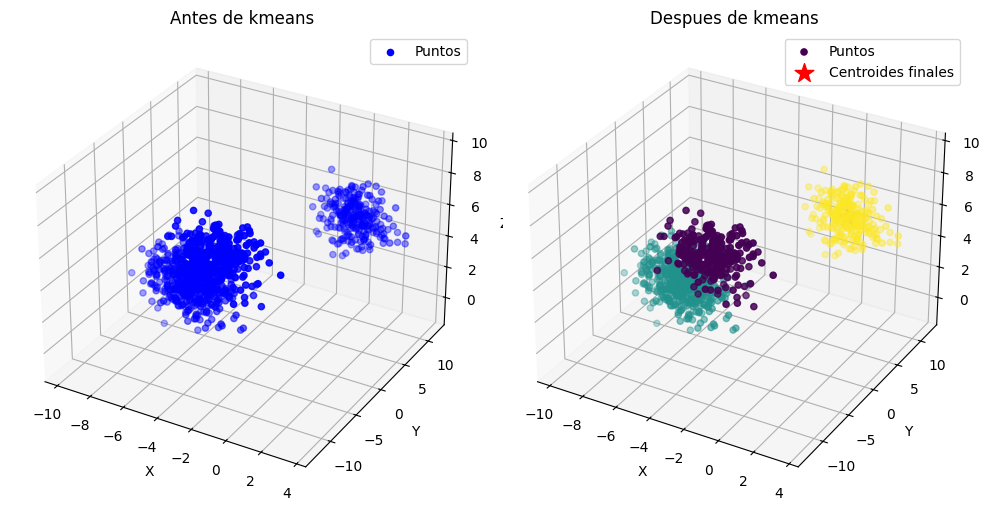

In [180]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

dibujar3D(points, kmeans.centroids, labels)

**EXPERIMENTO 2 ITERACCIÓN 1000**

[1 0 0 0 0 0 0 2 2 1 2 1 1 0 0 2 0 1 0 2 0 1 0 0 1 0 1 2 0 2 0 0 2 0 2 0 0
 2 0 1 0 0 0 0 0 2 1 2 0 2 0 0 2 0 0 2 0 1 2 0 2 2 0 0 1 0 0 2 0 0 2 0 2 0
 0 0 1 0 0 2 1 1 1 0 0 1 1 2 2 0 0 2 0 0 2 0 1 2 1 2 0 0 2 1 0 0 1 1 0 2 2
 1 0 1 2 1 0 2 1 0 1 0 0 1 2 1 0 2 0 0 0 2 0 0 0 0 2 0 2 0 1 2 2 1 2 2 1 1
 0 1 1 0 0 0 1 1 2 1 0 0 2 1 2 0 0 0 1 0 1 0 0 0 0 0 1 0 0 2 0 1 2 2 1 1 0
 0 2 0 0 0 1 2 1 1 0 1 2 1 0 0 0 2 1 1 2 0 0 2 2 2 0 0 0 1 0 1 1 2 1 0 0 2
 0 1 1 1 0 1 0 2 2 0 0 1 2 1 0 2 2 0 0 0 0 2 0 0 1 0 1 0 0 2 1 1 2 1 0 2 2
 0 1 1 2 2 2 0 1 0 1 1 0 1 1 1 2 0 0 1 1 0 0 0 2 2 1 1 2 0 2 2 0 0 2 2 2 1
 1 0 0 1 2 0 0 1 1 0 0 0 2 2 2 2 2 0 0 2 2 2 2 0 0 0 0 0 0 2 0 1 1 2 1 1 2
 0 0 0 0 2 1 1 0 0 1 0 2 0 2 0 0 1 2 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0
 0 0 0 0 2 0 0 0 2 1 0 0 1 0 0 2 2 1 0 2 2 0 2 0 1 1 2 0 0 0 0 2 0 0 0 1 0
 2 0 2 0 0 0 1 0 0 0 0 2 1 2 2 1 0 2 0 0 1 0 2 0 1 0 1 0 1 0 0 2 0 0 0 0 2
 0 1 1 2 1 2 1 2 0 2 0 0 2 1 1 0 2 1 1 0 1 0 0 1 0 0 2 2 0 1 0 2 0 0 0 0 0
 1 1 2 1 1 0 1 1 1 1 2 0 

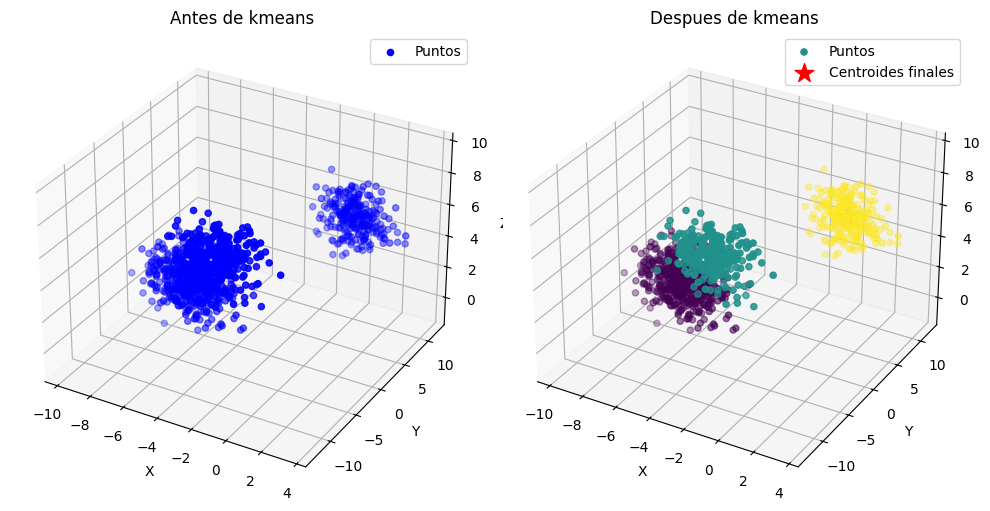

In [181]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

dibujar3D(points, kmeans.centroids, labels)

**EXPERIMENTO 2 ITERACCIÓN 10000**

[1 0 0 0 0 0 0 2 2 1 2 1 1 0 0 2 0 1 0 2 0 1 0 0 1 0 1 2 0 2 0 0 2 0 2 0 0
 2 0 1 0 0 0 0 0 2 1 2 0 2 0 0 2 0 0 2 0 1 2 0 2 2 0 0 1 0 0 2 0 0 2 0 2 0
 0 0 1 0 0 2 1 1 1 0 0 1 1 2 2 0 0 2 0 0 2 0 1 2 1 2 0 0 2 1 0 0 1 1 0 2 2
 1 0 1 2 1 0 2 1 0 1 0 0 1 2 1 0 2 0 0 0 2 0 0 0 0 2 0 2 0 1 2 2 1 2 2 1 1
 0 1 1 0 0 0 1 1 2 1 0 0 2 1 2 0 0 0 1 0 1 0 0 0 0 0 1 0 0 2 0 1 2 2 1 1 0
 0 2 0 0 0 1 2 1 1 0 1 2 1 0 0 0 2 1 1 2 0 0 2 2 2 0 0 0 1 0 1 1 2 1 0 0 2
 0 1 1 1 0 1 0 2 2 0 0 1 2 1 0 2 2 0 0 0 0 2 0 0 1 0 1 0 0 2 1 1 2 1 0 2 2
 0 1 1 2 2 2 0 1 0 1 1 0 1 1 1 2 0 0 1 1 0 0 0 2 2 1 1 2 0 2 2 0 0 2 2 2 1
 1 0 0 1 2 0 0 1 1 0 0 0 2 2 2 2 2 0 0 2 2 2 2 0 0 0 0 0 0 2 0 1 1 2 1 1 2
 0 0 0 0 2 1 1 0 0 1 0 2 0 2 0 0 1 2 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0
 0 0 0 0 2 0 0 0 2 1 0 0 1 0 0 2 2 1 0 2 2 0 2 0 1 1 2 0 0 0 0 2 0 0 0 1 0
 2 0 2 0 0 0 1 0 0 0 0 2 1 2 2 1 0 2 0 0 1 0 2 0 1 0 1 0 1 0 0 2 0 0 0 0 2
 0 1 1 2 1 2 1 2 0 2 0 0 2 1 1 0 2 1 1 0 1 0 0 1 0 0 2 2 0 1 0 2 0 0 0 0 0
 1 1 2 1 1 0 1 1 1 1 2 0 

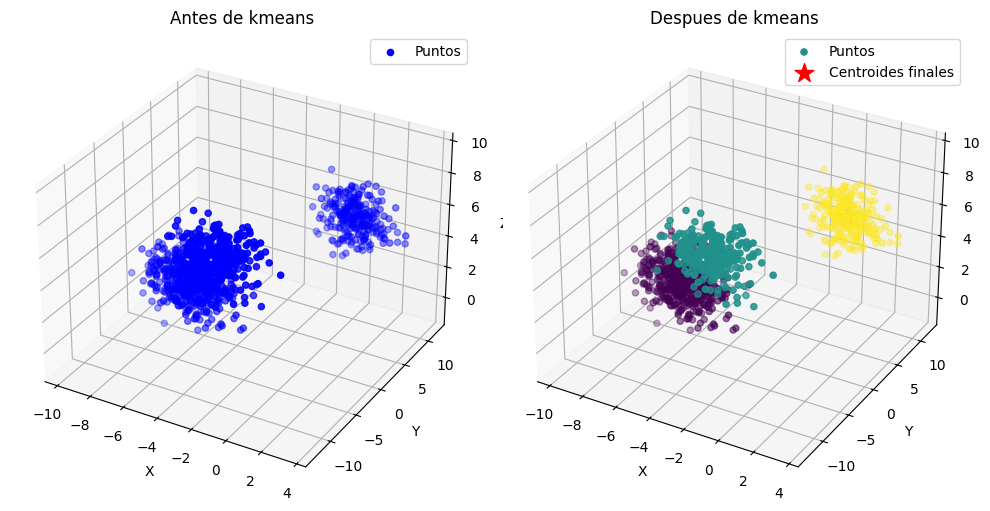

In [182]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

dibujar3D(points, kmeans.centroids, labels)

# EXPERIMENTO 3

Iteracion 10

In [183]:
import matplotlib.pyplot as plt
import numpy as np

class KMeans:

    def __init__(self, k=3, max_iter=10, centroids = None):

        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):

        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):

        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):

        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):


        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):


        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [184]:

from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)

kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)


[1 0 0 1 0 1 1 1 0 2 1 1 1 0 2 2 0 0 2 2 2 0 2 0 1 1 0 2 1 0 0 2 2 2 2 1 0
 1 1 0 2 0 1 2 1 2 2 0 0 2 2 0 2 0 0 2 0 1 0 0 2 1 2 0 0 2 2 2 0 0 0 2 1 0
 0 0 1 2 0 0 0 2 0 0 2 1 0 0 0 2 2 0 2 2 0 0 1 0 2 0 1 1 2 2 2 2 0 0 1 2 2
 1 2 1 2 2 0 1 0 0 2 1 0 0 1 1 2 2 0 2 0 0 1 0 2 0 0 1 2 2 0 0 2 2 2 2 2 0
 2 0 0 2 0 1 1 0 0 1 2 1 2 0 1 0 1 1 0 2 0 0 2 0 0 0 0 1 2 1 0 0 0 1 0 2 0
 1 0 0 0 0 0 1 1 0 1 2 0 0 0 1 2 0 0 2 0 1 0 2 2 2 2 2 0 0 0 0 1 0 1 0 0 2
 2 2 1 2 1 2 2 2 2 0 2 0 1 2 0 0 0 0 0 0 1 1 1 0 2 2 1 2 0 0 0 0 0 1 1 0 0
 0 2 1 0 0 2 0 0 0 1 0 1 0 0 2 0 2 2 1 0 0 0 1 1 2 0 2 0 0 0 1 0 0 0 0 0 1
 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 2 2 1 2 1 1 0 1 0 1 0 2 1 0 1 2 0 0 1
 1 0 0 0 0 0 1 0 2 1 0 1 0 2 1 0 0 2 0 2 2 0 1 1 1 0 0 2 0 0 0 0 0 0 0 2 0
 2 2 1 2 2 2 2 0 2 0 0 0 0 0 0 1 0 1 2 2 0 2 2 2 2 0 0 0 0 1 0 2 0 2 0 2 2
 1 0 1 2 0 0 1 0 2 1 0 0 0 0 0 0 1 0 1 1 2 0 2 0 1 1 0 2 0 0 2 0 1 1 0 1 0
 2 0 1 0 1 0 2 0 1 0 1 2 0 1 1 0 2 0 0 0 0 0 1 2 0 1 0 0 0 0 1 2 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 

Iteracion 100

In [185]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

[2 0 0 2 0 2 2 2 0 1 2 2 2 0 1 1 0 0 1 1 1 0 1 0 2 2 0 1 2 0 0 1 1 1 1 2 0
 2 2 0 1 0 2 1 2 1 1 0 0 1 1 0 1 0 0 1 0 2 0 0 1 2 1 0 0 1 1 1 0 0 0 1 2 0
 0 0 2 1 0 0 0 1 0 0 1 2 0 0 0 1 1 0 1 1 0 0 2 0 1 0 2 2 1 1 1 1 0 0 2 1 1
 2 1 2 1 1 0 2 0 0 1 2 0 0 2 2 1 1 0 1 0 0 2 0 1 0 0 2 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 2 2 0 0 2 1 2 1 0 2 0 2 2 0 1 0 0 1 0 0 0 0 2 1 2 0 0 0 2 0 1 0
 2 0 0 0 0 0 2 2 0 2 1 0 0 0 2 1 0 0 1 0 2 0 1 1 1 1 1 0 0 0 0 2 0 2 0 0 1
 1 1 2 1 2 1 1 1 1 0 1 0 2 1 0 0 0 0 0 0 2 2 2 0 1 1 2 1 0 0 0 0 0 2 2 0 0
 0 1 2 0 0 1 0 0 0 2 0 2 0 0 1 0 1 1 2 0 0 0 2 2 1 0 1 0 0 0 2 0 0 0 0 0 2
 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 1 1 2 1 2 2 0 2 0 2 0 1 2 0 2 1 0 0 2
 2 0 0 0 0 0 2 0 1 2 0 2 0 1 2 0 0 1 0 1 1 0 2 2 2 0 0 1 0 0 0 0 0 0 0 1 0
 1 1 2 1 1 1 1 0 1 0 0 0 0 0 0 2 0 2 1 1 0 1 1 1 1 0 0 0 0 2 0 1 0 1 0 1 1
 2 0 2 1 0 0 2 0 1 2 0 0 0 0 0 0 2 0 2 2 1 0 1 0 2 2 0 1 0 0 1 0 2 2 0 2 0
 1 0 2 0 2 0 1 0 2 0 2 1 0 2 2 0 1 0 0 0 0 0 2 1 0 2 0 0 0 0 2 1 0 2 0 0 0
 0 0 0 0 0 2 0 0 0 0 2 0 

In [186]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

[2 1 0 2 1 2 2 2 1 0 2 2 2 1 0 0 1 0 0 0 0 1 0 0 2 2 0 0 2 1 0 0 0 0 0 2 0
 2 2 1 0 1 2 0 2 0 0 0 0 0 0 1 0 0 1 0 0 2 1 0 0 2 0 0 0 0 0 0 1 1 1 0 2 0
 0 1 2 0 0 0 0 0 1 1 0 2 0 1 0 0 0 0 0 0 1 1 2 0 0 1 2 2 0 0 0 0 1 1 2 0 0
 2 0 2 0 0 0 2 1 0 0 2 1 1 2 2 0 0 0 0 1 1 2 0 0 0 0 2 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 2 2 1 0 2 0 2 0 0 2 1 2 2 0 0 1 0 0 1 0 0 0 2 0 2 1 0 0 2 1 0 0
 2 0 1 0 1 0 2 2 1 2 0 0 1 0 2 0 1 0 0 1 2 0 0 0 0 0 0 1 0 0 0 2 0 2 1 0 0
 0 0 2 0 2 0 0 0 0 0 0 1 2 0 1 0 1 0 1 1 2 2 2 0 0 0 2 0 0 1 1 1 0 2 2 0 1
 0 0 2 0 1 0 1 1 1 2 0 2 0 1 0 1 0 0 2 0 1 1 2 2 0 0 0 1 1 0 2 1 0 1 1 0 2
 0 0 0 1 1 1 1 0 1 1 1 0 0 2 0 2 1 1 0 0 2 0 2 2 0 2 1 2 0 0 2 1 2 0 0 1 2
 2 1 0 1 0 0 2 0 0 2 0 2 1 0 2 0 0 0 0 0 0 1 2 2 2 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 2 0 0 0 0 0 0 1 0 0 0 0 1 2 1 2 0 0 1 0 0 0 0 1 1 0 1 2 0 0 0 0 1 0 0
 2 0 2 0 0 1 2 1 0 2 1 1 1 0 1 0 2 0 2 2 0 0 0 0 2 2 1 0 1 1 0 0 2 2 1 2 1
 0 1 2 1 2 1 0 0 2 1 2 0 1 2 2 0 0 1 0 1 0 1 2 0 0 2 0 1 1 0 2 0 0 2 1 1 1
 1 0 1 0 0 2 0 1 0 1 2 0 

In [187]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

[1 0 2 1 0 1 1 1 0 1 1 1 1 0 1 1 0 2 1 1 1 0 1 2 1 1 2 1 1 0 2 1 1 1 1 1 2
 1 1 0 1 0 1 1 1 1 1 2 2 1 1 0 1 2 0 1 2 1 0 2 1 1 1 2 2 1 1 1 0 0 0 1 1 2
 2 0 1 1 2 2 2 1 0 0 1 1 2 0 2 1 1 2 1 1 0 0 1 2 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 2 1 0 2 1 1 0 0 1 1 1 1 2 1 0 0 1 2 1 2 2 1 1 1 2 0 1 1 1 1 1 0
 1 0 0 1 2 1 1 0 2 1 1 1 1 2 1 0 1 1 2 1 0 2 1 0 2 2 2 1 1 1 0 2 2 1 0 1 2
 1 2 0 2 0 2 1 1 0 1 1 2 0 2 1 1 0 2 1 0 1 2 1 1 1 1 1 0 2 2 2 1 2 1 0 2 1
 1 1 1 1 1 1 1 1 1 2 1 0 1 1 0 2 0 2 0 0 1 1 1 2 1 1 1 1 2 0 0 0 2 1 1 2 0
 2 1 1 2 0 1 0 0 0 1 2 1 2 0 1 0 1 1 1 2 0 0 1 1 1 2 1 0 0 2 1 0 2 0 0 2 1
 2 1 2 0 0 0 0 2 0 0 0 2 2 1 2 1 0 0 1 1 1 1 1 1 2 1 0 1 2 1 1 0 1 1 2 0 1
 1 0 2 0 2 2 1 2 1 1 2 1 0 1 1 2 2 1 2 1 1 0 1 1 1 2 0 1 0 0 2 0 2 0 0 1 2
 1 1 1 1 1 1 1 2 1 0 2 2 2 2 0 1 0 1 1 1 0 1 1 1 1 0 0 2 0 1 2 1 2 1 0 1 1
 1 2 1 1 2 0 1 0 1 1 0 0 0 2 0 2 1 2 1 1 1 2 1 2 1 1 0 1 0 0 1 2 1 1 0 1 0
 1 0 1 0 1 0 1 2 1 0 1 1 0 1 1 2 1 0 2 0 2 0 1 1 2 1 2 0 0 2 1 1 2 1 0 0 0
 0 2 0 2 2 1 2 0 2 0 1 2 

In [188]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

[2 1 0 2 1 2 2 2 1 2 2 2 2 1 2 2 1 0 2 2 2 1 2 0 2 2 0 2 2 1 0 2 2 2 2 2 0
 2 2 1 2 1 2 2 2 2 2 0 0 2 2 1 2 0 1 2 0 2 1 0 2 2 2 0 0 2 2 2 1 1 1 2 2 0
 0 1 2 2 0 0 0 2 1 1 2 2 0 1 0 2 2 0 2 2 1 1 2 0 2 1 2 2 2 2 2 2 1 1 2 2 2
 2 2 2 2 2 0 2 1 0 2 2 1 1 2 2 2 2 0 2 1 1 2 0 2 0 0 2 2 2 0 1 2 2 2 2 2 1
 2 1 1 2 0 2 2 1 0 2 2 2 2 0 2 1 2 2 0 2 1 0 2 1 0 0 0 2 2 2 1 0 0 2 1 2 0
 2 0 1 0 1 0 2 2 1 2 2 0 1 0 2 2 1 0 2 1 2 0 2 2 2 2 2 1 0 0 0 2 0 2 1 0 2
 2 2 2 2 2 2 2 2 2 0 2 1 2 2 1 0 1 0 1 1 2 2 2 0 2 2 2 2 0 1 1 1 0 2 2 0 1
 0 2 2 0 1 2 1 1 1 2 0 2 0 1 2 1 2 2 2 0 1 1 2 2 2 0 2 1 1 0 2 1 0 1 1 0 2
 0 2 0 1 1 1 1 0 1 1 1 0 0 2 0 2 1 1 2 2 2 2 2 2 0 2 1 2 0 2 2 1 2 2 0 1 2
 2 1 0 1 0 0 2 0 2 2 0 2 1 2 2 0 0 2 0 2 2 1 2 2 2 0 1 2 1 1 0 1 0 1 1 2 0
 2 2 2 2 2 2 2 0 2 1 0 0 0 0 1 2 1 2 2 2 1 2 2 2 2 1 1 0 1 2 0 2 0 2 1 2 2
 2 0 2 2 0 1 2 1 2 2 1 1 1 0 1 0 2 0 2 2 2 0 2 0 2 2 1 2 1 1 2 0 2 2 1 2 1
 2 1 2 1 2 1 2 0 2 1 2 2 1 2 2 0 2 1 0 1 0 1 2 2 0 2 0 1 1 0 2 2 0 2 1 1 1
 1 0 1 0 0 2 0 1 0 1 2 0 

# 4. Experimento

In [189]:
import matplotlib.pyplot as plt
import numpy as np

class KMeans:

    def __init__(self, k=3, max_iter=10, centroids = None):

        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):

        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):

        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):

        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):


        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):


        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [190]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

[0 2 1 2 2 2 1 0 1 1 0 2 2 1 1 1 2 1 1 2 1 1 0 2 0 2 1 1 1 0 1 2 1 1 1 1 1
 1 1 2 1 0 1 0 1 1 2 1 0 0 0 0 0 1 1 1 1 1 2 1 0 1 0 1 1 1 1 1 0 2 2 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 2 2 1 0 2 1 1 1 1 2 2 1 1 1 1 2 0 1 2 2 2 0
 2 0 1 1 1 2 1 2 0 1 2 1 0 0 2 2 0 1 1 0 1 1 2 1 2 1 0 2 0 2 2 2 1 1 1 2 1
 2 0 1 2 0 0 1 2 1 2 2 1 0 1 1 0 1 0 1 2 1 2 1 0 1 2 1 2 0 1 1 2 0 0 1 0 2
 1 0 2 2 1 1 0 1 2 0 2 2 0 1 0 0 0 1 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 2 1 1 1 2 1 0 1 0 1 1 1 2 1 1 2 1 2 2 1 1 1
 1 0 2 0 0 2 2 2 2 1 1 1 2 1 1 0 0 2 1 2 2 2 1 0 2 0 0 1 0 2 1 2 1 1 1 0 2
 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 2 0 0 2 1 0 1 0 1 1 1 1 2 1 1 0 1 2 1 2
 1 1 1 2 1 2 2 1 1 1 2 1 0 2 1 1 1 2 0 0 1 1 0 1 0 1 1 2 0 1 1 2 1 0 1 1 1
 0 0 2 1 1 2 1 0 1 2 1 1 0 1 1 1 0 2 0 1 1 1 1 0 0 0 1 1 1 1 1 1 2 2 1 0 0
 2 0 1 1 0 0 1 1 0 1 1 1 0 1 0 2 2 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 2 2 1 0
 2 1 0 2 2 1 0 1 0 1 2 1 2 2 2 1 1 0 2 2 1 0 2 0 1 2 0 1 0 1 0 2 0 1 2 1 1
 2 1 2 2 0 1 1 1 2 0 1 1 

In [191]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

[1 0 2 0 0 0 2 1 2 2 1 0 0 2 2 0 0 0 0 0 0 2 1 0 1 0 0 2 2 1 0 0 2 0 0 0 0
 0 0 0 0 1 0 1 0 2 0 0 1 1 1 1 1 0 0 2 0 0 0 0 1 0 1 2 0 0 2 2 1 0 0 2 2 2
 1 1 2 2 2 0 1 2 0 0 0 1 0 0 1 0 0 2 1 0 0 2 0 2 0 0 0 2 2 2 0 1 2 0 0 0 1
 0 1 2 2 2 0 0 0 1 2 0 0 1 1 0 0 1 2 0 1 0 2 0 2 0 0 1 0 1 0 0 0 2 0 0 0 0
 0 1 0 0 1 1 2 0 2 0 0 0 1 2 2 1 2 1 2 0 2 0 0 1 2 0 2 0 1 2 0 0 1 1 0 1 0
 2 1 0 0 0 2 1 2 0 1 0 0 1 0 1 1 1 0 0 0 2 0 0 2 0 0 2 2 2 2 2 0 0 2 2 2 2
 1 2 1 2 1 1 0 0 0 0 0 2 1 0 0 0 0 0 2 0 2 1 2 1 0 0 2 0 2 0 0 2 0 0 2 0 2
 2 1 0 1 1 0 0 0 0 2 0 2 0 2 2 1 1 0 2 0 0 0 0 1 0 1 1 2 1 0 2 0 0 0 2 1 0
 2 2 0 0 1 1 1 1 1 0 0 1 0 1 0 2 0 0 1 1 0 0 1 0 1 2 0 0 0 0 2 0 1 0 0 2 0
 2 0 0 0 0 0 0 0 2 0 0 0 1 0 0 2 0 0 1 1 0 0 1 2 1 2 2 0 1 0 2 0 2 1 0 0 0
 1 1 0 0 2 0 0 1 2 0 2 0 1 2 2 2 1 0 1 2 2 2 0 1 1 1 0 0 2 0 0 0 0 0 0 1 1
 0 1 2 2 1 1 2 2 1 0 0 2 1 0 1 0 0 2 0 2 2 0 0 0 0 0 2 0 0 2 2 0 0 0 0 2 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 2 1 0 0 0 1 0 1 0 0 1 2 1 2 1 0 1 2 0 2 2
 0 2 0 0 1 0 2 2 0 1 2 2 

In [192]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

[0 1 2 1 1 1 2 0 2 2 0 1 1 2 2 2 1 2 2 1 2 2 0 1 0 1 2 2 2 0 2 1 2 2 2 2 2
 2 2 1 2 0 2 0 2 2 1 2 0 0 0 0 0 2 2 2 2 2 1 2 0 2 0 2 2 2 2 2 0 1 1 2 2 2
 0 0 2 2 2 2 0 2 2 2 2 0 2 2 0 1 1 2 0 1 2 2 2 2 1 1 2 2 2 2 1 0 2 1 1 1 0
 1 0 2 2 2 1 2 1 0 2 1 2 0 0 1 1 0 2 2 0 2 2 1 2 1 2 0 1 0 1 1 1 2 2 2 1 2
 1 0 2 1 0 0 2 1 2 1 1 2 0 2 2 0 2 0 2 1 2 1 2 0 2 1 2 1 0 2 2 1 0 0 2 0 1
 2 0 1 1 2 2 0 2 1 0 1 1 0 2 0 0 0 2 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2
 0 2 0 2 0 0 2 2 2 2 2 2 0 2 2 1 2 2 2 1 2 0 2 0 2 2 2 1 2 2 1 2 1 1 2 2 2
 2 0 1 0 0 1 1 1 1 2 2 2 1 2 2 0 0 1 2 1 1 1 2 0 1 0 0 2 0 1 2 1 2 2 2 0 1
 2 2 2 2 0 0 0 0 0 2 2 0 2 0 2 2 2 1 0 0 1 2 0 2 0 2 2 2 2 1 2 2 0 2 1 2 1
 2 2 2 1 2 1 1 2 2 2 1 2 0 1 2 2 2 1 0 0 2 2 0 2 0 2 2 1 0 2 2 1 2 0 2 2 2
 0 0 1 2 2 1 2 0 2 1 2 2 0 2 2 2 0 1 0 2 2 2 2 0 0 0 2 2 2 2 2 2 1 1 2 0 0
 1 0 2 2 0 0 2 2 0 2 2 2 0 2 0 1 1 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 1 1 2 0
 1 2 0 1 1 2 0 2 0 2 1 2 1 1 1 2 2 0 1 1 2 0 1 0 2 1 0 2 0 2 0 1 0 2 1 2 2
 1 2 1 1 0 2 2 2 1 0 2 2 

In [193]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

[0 0 2 0 0 0 2 0 2 2 0 0 0 2 2 1 0 1 1 0 1 2 0 0 0 0 1 2 2 0 1 0 2 1 1 1 1
 1 1 0 1 0 1 0 1 2 0 1 0 0 0 0 0 1 1 2 1 1 0 1 0 1 0 2 1 1 2 2 0 0 0 2 2 2
 0 0 2 2 2 1 0 2 1 1 1 0 1 1 0 0 0 2 0 0 1 2 1 2 0 0 1 2 2 2 0 0 2 0 0 0 0
 0 0 2 2 2 0 1 0 0 2 0 1 0 0 0 0 0 2 1 0 1 2 0 2 0 1 0 0 0 0 0 0 2 1 1 0 1
 0 0 1 0 0 0 2 0 2 0 0 1 0 2 2 0 2 0 2 0 2 0 1 0 2 0 2 0 0 2 1 0 0 0 1 0 0
 2 0 0 0 1 2 0 2 0 0 0 0 0 1 0 0 0 1 1 0 2 0 1 2 0 0 2 2 2 2 2 0 1 2 2 2 2
 0 2 0 2 0 0 1 1 1 1 1 2 0 1 1 0 1 1 2 0 2 0 2 0 1 1 2 0 2 1 0 2 0 0 2 1 2
 2 0 0 0 0 0 0 0 0 2 1 2 0 2 2 0 0 0 2 0 0 0 1 0 0 0 0 2 0 0 2 0 1 1 2 0 0
 2 2 1 1 0 0 0 0 0 1 1 0 1 0 1 2 1 0 0 0 0 1 0 1 0 2 1 1 1 0 2 1 0 1 0 2 0
 2 1 1 0 1 0 0 1 2 1 0 1 0 0 1 2 1 0 0 0 1 1 0 2 0 2 2 0 0 1 2 0 2 0 1 1 1
 0 0 0 1 2 0 1 0 2 0 2 1 0 2 2 2 0 0 0 2 2 2 1 0 0 0 1 1 2 1 1 1 0 0 1 0 0
 0 0 2 2 0 0 2 2 0 1 1 2 0 1 0 0 0 2 1 2 2 1 0 0 1 1 2 1 0 2 2 1 1 0 0 2 0
 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 2 0 0 0 1 0 0 0 1 0 0 2 0 2 0 0 0 2 0 2 2
 0 2 0 0 0 1 2 2 0 0 2 2 

# EXPERIMENTO 5

In [194]:
import matplotlib.pyplot as plt
import numpy as np

class KMeans:

    def __init__(self, k=3, max_iter=10, centroids = None):

        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):

        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):

        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):

        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):


        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):


        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [195]:
def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

[0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 

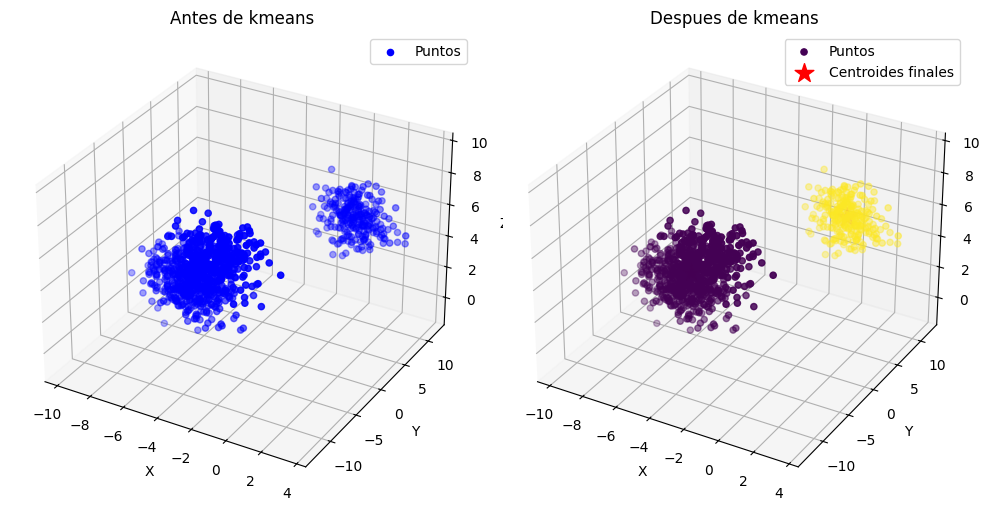

In [196]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)

kmeans = KMeans(k=2, max_iter=1000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

[0 2 2 2 2 2 2 1 1 0 1 0 0 2 2 1 2 0 2 1 2 0 2 2 0 2 0 1 2 1 2 2 1 2 1 2 2
 1 2 0 2 2 2 2 2 1 0 1 2 1 2 2 1 2 2 1 2 0 1 2 1 1 2 2 0 2 2 1 2 2 1 2 1 2
 2 2 0 2 2 1 0 0 0 2 2 0 0 1 1 2 2 1 2 2 1 2 0 1 0 1 2 2 1 0 2 2 0 0 2 1 1
 0 2 0 1 0 2 1 0 2 0 2 2 0 1 0 2 1 2 2 2 1 2 2 2 2 1 2 1 2 0 1 1 0 1 1 0 0
 2 0 0 2 2 2 0 0 1 0 2 2 1 0 1 2 2 2 0 2 0 2 2 2 2 2 0 2 2 1 2 0 1 1 0 0 2
 2 1 2 2 2 0 1 0 0 2 0 1 0 2 2 2 1 0 0 1 2 2 1 1 1 2 2 2 0 2 0 0 1 0 2 2 1
 2 0 0 0 2 0 2 1 1 2 2 0 1 0 2 1 1 2 2 2 2 1 2 2 0 2 0 2 2 1 0 0 1 0 2 1 1
 2 0 0 1 1 1 2 0 2 0 0 2 0 0 0 1 2 2 0 0 2 2 2 1 1 0 0 1 2 1 1 2 2 1 1 1 0
 0 2 2 0 1 2 2 0 0 2 2 2 1 1 1 1 1 2 2 1 1 1 1 2 2 2 2 2 2 1 2 0 0 1 0 0 1
 2 2 2 2 1 0 0 2 2 0 2 1 2 1 2 2 0 1 0 0 0 0 2 0 2 2 0 2 0 2 0 2 0 0 0 0 2
 2 2 2 2 1 2 2 2 1 0 2 2 0 2 2 1 1 0 2 1 1 2 1 2 0 0 1 2 2 2 2 1 2 2 2 0 2
 1 2 1 2 2 2 0 2 2 2 2 1 0 1 1 0 2 1 2 2 0 2 1 2 0 2 0 2 0 2 2 1 2 2 2 2 1
 2 0 0 1 0 1 0 1 2 1 2 2 1 0 0 2 1 0 0 2 0 2 2 0 2 2 1 1 2 0 2 1 2 2 2 2 2
 0 0 1 0 0 2 0 0 0 0 1 2 

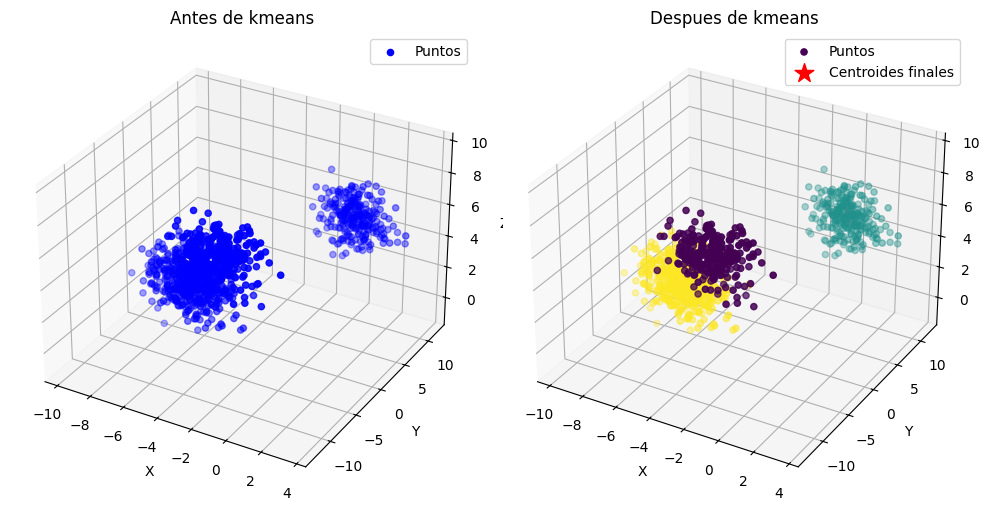

In [197]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)

kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

[2 3 3 3 4 3 4 1 0 2 0 2 2 4 4 0 4 2 3 0 3 2 3 4 3 4 2 1 3 1 3 3 1 3 0 3 4
 0 4 2 3 3 4 3 4 1 2 0 4 1 3 3 0 3 4 0 3 2 1 4 1 1 4 3 2 4 3 1 4 4 1 3 0 4
 4 4 2 3 4 0 2 2 2 3 4 2 2 1 1 4 4 0 3 3 1 3 2 1 2 1 3 3 1 2 4 3 3 2 3 0 1
 2 4 2 0 2 3 0 2 4 2 3 3 2 1 2 3 0 4 4 3 0 3 3 4 3 1 4 1 4 2 0 1 2 1 0 2 2
 3 2 2 4 4 3 2 2 1 2 3 4 1 2 1 3 3 3 2 3 2 3 4 3 4 4 2 3 4 0 3 2 1 1 2 2 4
 3 0 3 3 3 2 1 3 2 4 2 0 2 4 4 3 0 2 2 1 4 4 1 0 0 3 3 3 2 3 2 2 1 2 4 4 0
 4 2 2 2 3 2 4 0 0 4 4 2 0 2 3 0 1 3 4 3 4 1 4 3 2 4 2 4 3 0 2 2 0 2 3 1 1
 3 2 2 1 1 0 4 2 3 3 2 3 2 2 2 0 4 4 2 2 3 4 4 0 1 2 2 1 4 1 0 3 3 0 0 0 2
 2 3 3 2 1 3 4 2 2 3 3 3 0 0 0 0 0 4 4 0 0 0 0 4 3 3 4 3 4 0 4 2 2 1 2 2 0
 4 3 3 3 1 2 2 4 4 2 4 0 3 0 3 3 3 1 2 2 2 2 4 2 4 3 2 3 2 3 2 4 2 2 2 2 3
 4 4 3 3 1 4 3 3 0 2 4 3 2 4 4 1 0 2 3 1 0 3 0 3 2 2 1 3 4 4 4 1 3 4 3 2 3
 0 4 0 3 3 3 2 4 3 3 3 0 2 0 1 2 4 1 3 4 2 3 1 4 2 4 2 3 2 4 4 0 3 3 4 3 0
 4 2 2 0 2 0 2 0 4 0 3 4 1 2 2 4 0 2 2 3 2 4 4 2 4 4 1 0 4 2 3 0 4 3 4 3 4
 2 2 0 2 2 3 2 2 2 2 0 4 

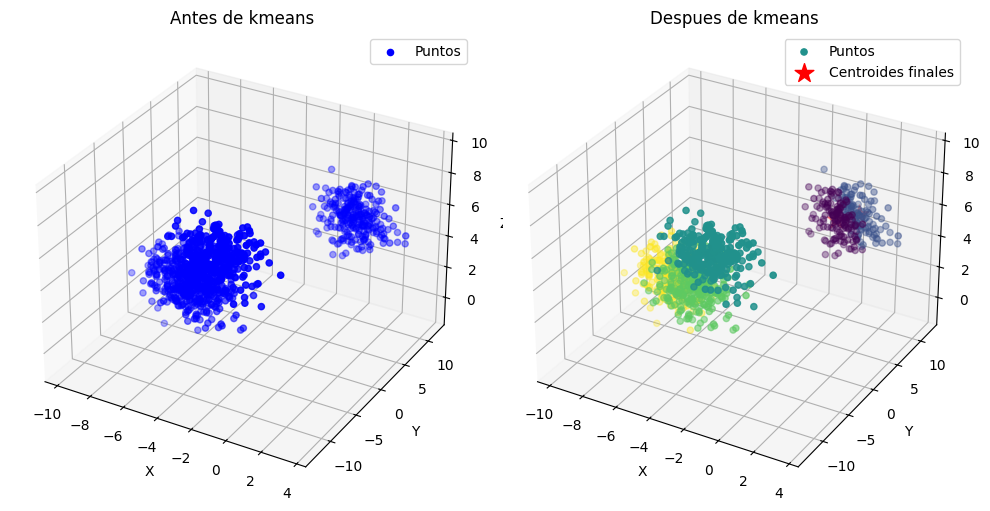

In [198]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)

kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

[7 3 5 2 6 5 0 8 8 1 8 7 7 0 0 8 6 7 2 8 9 4 5 6 1 6 4 8 2 8 5 9 8 3 8 5 0
 8 6 1 5 9 0 3 6 8 4 8 0 8 5 3 8 9 0 8 9 7 8 0 8 8 0 3 7 0 3 8 0 6 8 5 8 0
 0 0 7 5 0 8 1 7 7 9 0 1 4 8 8 6 2 8 9 2 8 3 4 8 1 8 2 5 8 7 6 3 5 4 3 8 8
 1 0 7 8 1 2 8 7 0 1 5 3 4 8 1 2 8 0 6 2 8 3 2 6 2 8 0 8 0 4 8 8 7 8 8 1 1
 2 4 1 0 6 5 4 7 8 1 5 0 8 7 8 9 5 9 7 9 4 3 2 9 6 0 4 9 0 8 3 4 8 8 7 1 0
 5 8 3 5 9 1 8 5 1 6 7 8 4 6 0 9 8 1 1 8 6 6 8 8 8 5 2 9 4 5 1 7 8 1 2 0 8
 6 7 4 4 3 4 0 8 8 6 6 4 8 1 3 8 8 5 6 9 0 8 6 5 4 0 7 6 9 8 4 4 8 1 3 8 8
 9 7 4 8 8 8 0 7 5 5 1 3 4 7 4 8 0 0 7 4 5 0 6 8 8 4 7 8 0 8 8 5 9 8 8 8 7
 4 2 2 4 8 9 0 1 4 9 3 3 8 8 8 8 8 6 0 8 8 8 8 6 9 9 2 5 0 8 6 4 4 8 7 1 8
 6 2 2 3 8 4 7 6 0 7 0 8 5 8 3 5 5 8 4 4 7 7 6 7 0 9 4 2 4 3 4 6 1 4 4 4 9
 0 0 9 9 8 6 9 2 8 4 6 2 7 6 0 8 8 7 3 8 8 9 8 5 1 4 8 3 0 0 6 8 3 0 2 4 9
 8 0 8 5 2 3 1 6 3 5 9 8 7 8 8 4 6 8 3 0 1 3 8 6 4 6 1 5 1 0 0 8 5 9 6 3 8
 6 1 7 8 4 8 1 8 0 8 9 0 8 4 4 0 8 4 1 2 1 0 0 1 6 0 8 8 0 4 2 8 0 5 0 2 6
 1 7 8 4 7 3 4 7 7 4 8 0 

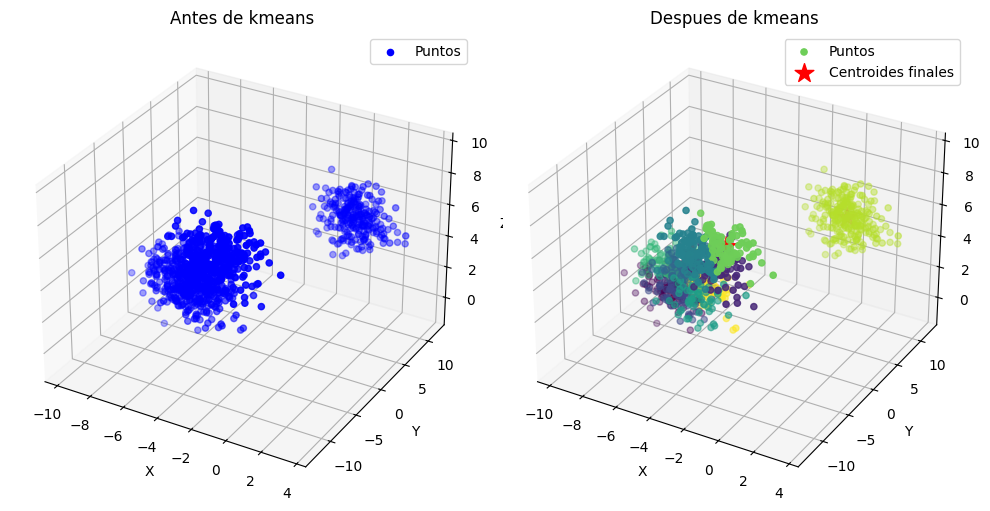

In [199]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)

kmeans = KMeans(k=10, max_iter=1000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

# EXPERIMENTO 6

In [200]:
import matplotlib.pyplot as plt
import numpy as np

class KMeans:

    def __init__(self, k=3, max_iter=10, centroids = None):

        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):

        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):

        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):

        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):


        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):


        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()



[4 1 3 2 1 1 1 2 2 3 3 3 1 4 4 2 2 2 4 4 3 2 2 2 3 3 2 4 3 3 3 1 4 4 1 2 2
 2 1 2 3 4 4 2 0 0 3 4 0 2 2 2 0 2 3 2 3 3 0 4 1 3 2 1 2 0 4 4 4 2 1 3 3 4
 1 0 3 4 1 0 3 2 1 1 3 3 4 2 0 0 3 4 1 3 0 3 4 4 1 4 1 2 0 2 4 1 2 4 1 0 3
 4 1 4 1 0 2 0 2 4 3 2 4 2 4 2 3 0 1 4 2 1 3 2 1 4 4 2 1 2 4 3 3 2 2 4 4 1
 4 4 3 4 3 3 0 4 2 4 2 3 1 2 3 2 0 1 4 3 0 4 0 4 1 4 3 2 3 3 0 2 4 4 4 2 0
 2 3 0 0 4 4 2 4 2 4 1 1 3 1 4 4 3 2 2 3 3 0 3 1 3 3 1 3 2 1 3 1 2 3 4 2 2
 3 0 3 1 3 2 2 0 3 2 2 0 1 4 1 4 0 2 3 4 3 2 2 0 2 1 1 4 3 2 4 3 2 0 3 2 3
 0 4 1 2 3 4 4 2 3 3 0 2 1 3 2 4 0 3 4 4 1 0 4 4 3 4 1 4 2 3 3 4 3 3 4 1 1
 4 1 3 4 2 2 0 2 4 2 3 0 4 3 3 4 3 3 0 0 4 3 2 2 3 2 3 4 4 3 2 1 4 0 4 4 3
 1 3 4 3 3 1 3 3 0 3 0 1 2 3 3 4 2 2 4 3 2 2 4 4 3 4 2 0 4 3 0 4 1 1 4 4 3
 4 0 2 0 0 2 4 1 2 4 4 3 1 0 1 0 1 3 3 2 3 4 0 0 1 1 3 3 1 4 4 4 2 3 3 4 2
 4 3 4 1 1 3 2 2 2 3 4 2 2 0 1 4 0 1 4 2 4 2 2 2 2 3 3 2 2 4 4 2 4 1 0 4 4
 3 4 0 2 3 3 3 1 1 1 3 4 4 4 1 4 2 2 3 0 2 2 4 2 0 1 2 1 2 2 3 1 4 3 3 4 3
 3 2 1 2 3 4 4 2 2 2 4 2 

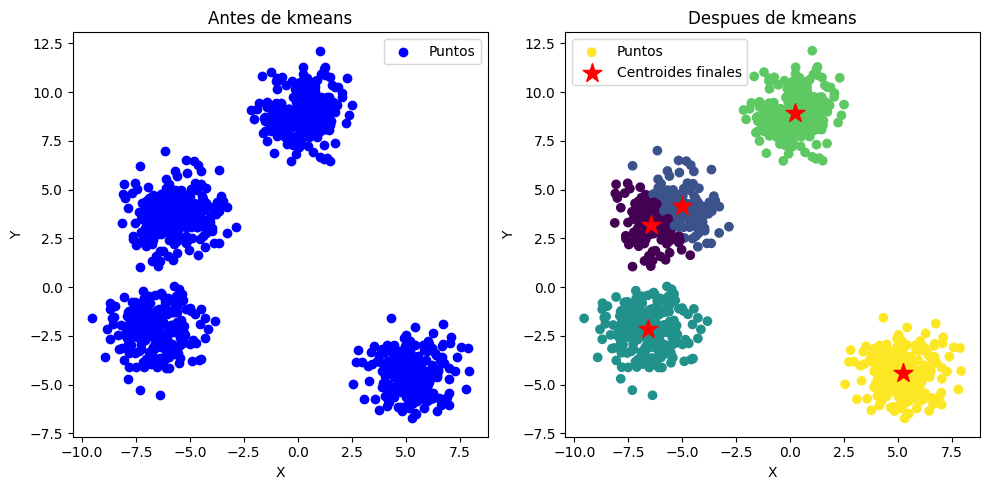

In [201]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)

kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

dibujar2D(points, kmeans.centroids, labels)

[0 3 1 3 3 3 3 3 3 1 1 1 3 2 2 3 3 3 4 2 1 3 3 3 1 1 3 2 1 1 1 3 4 0 3 3 3
 3 3 3 1 2 4 3 3 3 1 0 3 3 3 3 3 3 1 3 1 1 3 4 1 1 3 3 3 3 4 2 4 3 3 1 1 2
 3 3 1 0 3 3 1 3 3 3 1 1 0 3 3 3 1 2 3 1 3 1 4 0 3 0 3 3 3 3 0 3 3 4 3 3 1
 2 3 4 3 3 3 3 3 2 1 3 0 3 0 3 1 3 3 0 3 3 1 3 3 0 4 3 3 3 4 1 1 3 3 0 2 3
 0 4 1 2 1 1 3 0 3 2 3 1 3 3 1 3 3 3 0 1 3 2 3 0 3 4 1 3 1 1 3 3 0 2 0 3 3
 3 1 3 3 4 0 3 0 3 4 3 3 1 3 0 0 1 3 3 1 1 3 1 3 1 1 3 1 3 3 1 3 3 1 2 3 3
 1 3 1 3 1 3 3 3 1 3 3 3 3 0 3 2 3 3 1 4 1 3 3 3 3 3 3 4 1 3 0 1 3 3 1 3 1
 3 2 3 3 1 0 2 3 1 1 3 3 3 1 3 2 3 1 4 2 3 3 2 4 1 2 3 2 3 1 1 2 1 1 2 3 3
 2 3 1 0 3 3 3 3 0 3 1 3 4 1 1 4 1 1 3 3 2 1 3 3 1 3 1 0 2 1 3 3 4 3 4 4 1
 3 1 0 1 1 3 1 1 3 1 3 3 3 1 1 2 3 3 0 1 3 3 0 2 1 4 3 3 0 1 3 0 3 3 2 0 1
 4 3 3 3 3 3 0 3 3 2 2 1 3 3 3 3 3 1 1 3 1 2 3 3 3 3 1 1 3 2 4 2 3 1 1 0 3
 0 1 2 3 3 1 3 3 3 1 0 3 3 3 3 4 3 3 0 3 2 3 3 3 3 1 1 3 3 4 0 3 4 3 3 2 0
 1 0 3 3 1 1 1 3 3 3 1 2 0 0 3 4 3 3 1 3 3 3 0 3 3 3 3 3 3 3 1 3 0 1 1 0 1
 1 3 3 3 1 0 4 3 3 3 4 3 

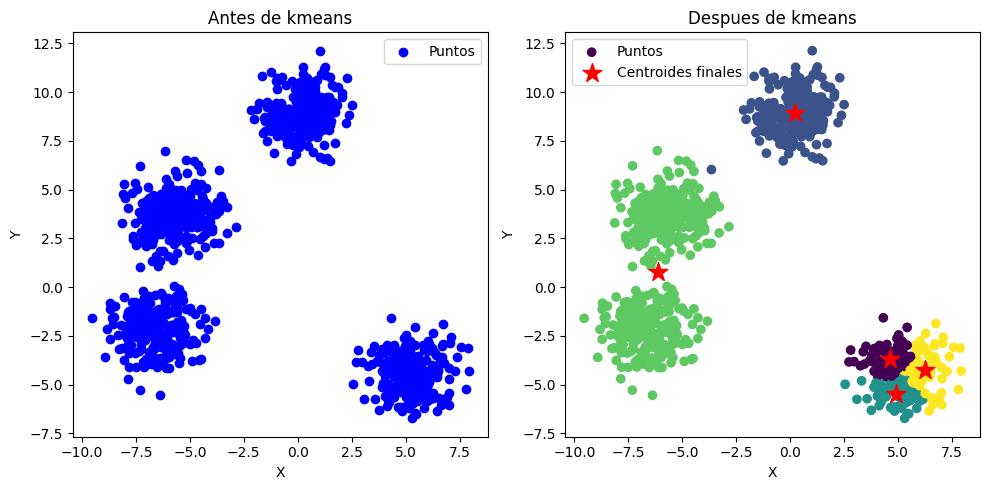

In [202]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)

kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points, tipo_distance="manhattan")
print(labels)
print(kmeans.centroids)

dibujar2D(points, kmeans.centroids, labels)

[0 2 4 3 2 2 2 3 3 4 4 4 2 1 1 3 3 3 0 1 4 3 3 3 4 4 3 1 4 4 4 2 0 0 2 3 3
 3 2 3 4 1 0 3 2 2 4 1 2 3 3 3 2 3 4 3 4 4 2 0 2 4 3 2 3 2 0 1 0 3 2 4 4 1
 2 2 4 1 2 2 4 3 2 2 4 4 1 3 2 2 4 1 2 4 2 4 1 1 2 1 2 3 2 3 1 2 3 0 2 2 4
 1 2 0 2 2 3 2 3 1 4 3 0 3 0 3 4 2 2 1 3 2 4 3 2 0 0 3 2 3 0 4 4 3 3 1 1 2
 0 0 4 1 4 4 2 1 3 1 3 4 2 3 4 3 2 2 1 4 2 1 2 0 2 0 4 3 4 4 2 3 1 1 1 3 2
 3 4 2 2 0 1 3 0 3 0 2 2 4 2 1 0 4 3 3 4 4 2 4 2 4 4 2 4 3 2 4 2 3 4 1 3 3
 4 2 4 2 4 3 3 2 4 3 3 2 2 0 2 1 2 3 4 0 4 3 3 2 3 2 2 0 4 3 1 4 3 2 4 3 4
 2 1 2 3 4 1 1 3 4 4 2 3 2 4 3 1 2 4 0 1 2 2 1 0 4 1 2 1 3 4 4 1 4 4 1 2 2
 1 2 4 0 3 3 2 3 0 3 4 2 0 4 4 0 4 4 2 2 1 4 3 3 4 3 4 0 1 4 3 2 0 2 0 0 4
 2 4 0 4 4 2 4 4 2 4 2 2 3 4 4 1 3 3 1 4 3 3 1 1 4 0 3 2 1 4 2 1 2 2 1 1 4
 0 2 3 2 2 3 0 2 3 1 1 4 2 2 2 2 2 4 4 3 4 1 2 2 2 2 4 4 2 1 0 1 3 4 4 0 3
 0 4 1 2 2 4 3 3 3 4 0 3 3 2 2 0 2 2 0 3 1 3 3 3 3 4 4 3 3 0 1 3 1 2 2 1 1
 4 1 2 3 4 4 4 2 2 2 4 1 0 1 2 0 3 3 4 2 3 3 0 3 2 2 3 2 3 3 4 2 0 4 4 1 4
 4 3 2 3 4 1 0 3 3 3 0 3 

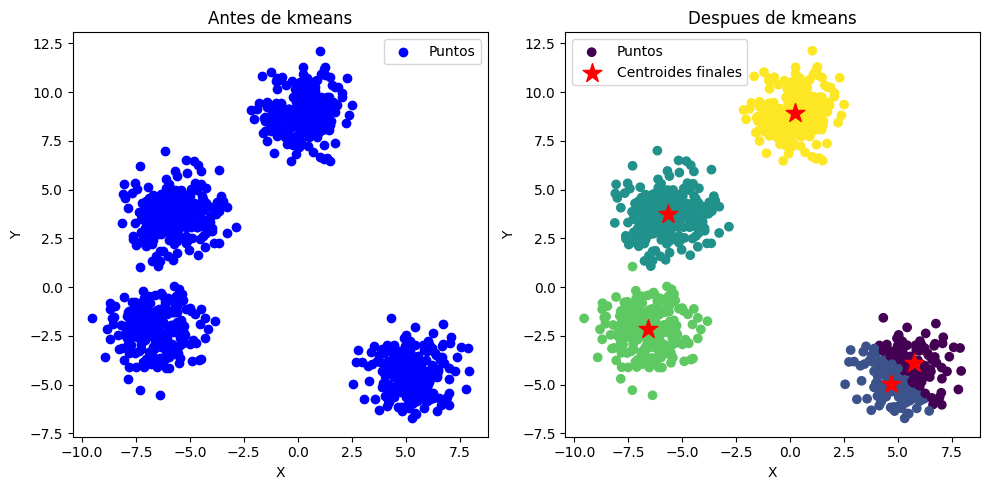

In [203]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)

kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points, tipo_distance="mahalanobis")
print(labels)
print(kmeans.centroids)

dibujar2D(points, kmeans.centroids, labels)